# Footprints in the Forest
### A Visual Journey Through Bigfoot Sightings

In the dense woods and remote wilderness, a legend roams: Bigfoot. Over the years, sightings and encounters have fueled speculation and curiosity. 

Now, armed with a trove of data spanning generations, we embark on a journey of exploration. Through data analysis and visual storytelling, we aim to uncover patterns, map sightings, and perhaps shed light on this enduring enigma. 

Welcome to the quest to decode the mysteries of Bigfoot.

## Loading and preparing the dataset

In [52]:
# Load the libraries
# %pip install wordcloud folium plotly pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium import plugins
from folium.plugins import HeatMap

import plotly.express as px

import datetime
from datetime import date

from wordcloud import WordCloud

In [2]:
df = pd.read_csv('bfro_reports_geocoded.csv')
df.head()

,index,observed,location_details,county,state,season,title,latitude,longitude,date,...,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed
0,0,I was canoeing on the Sipsey river in Alabama....,NaN,Winston County,Alabama,Summer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Ed L. was salmon fishing with a companion in P...,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"While attending U.R.I in the Fall of 1974,I wo...","Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45,-71.5,1974-09-20,...,0.16,0.0,0.0,NaN,1020.61,Foggy until afternoon.,4.0,2.75,198.0,6.92
3,3,"Hello, My name is Doug and though I am very re...",I would rather not have exact location (listin...,York County,Pennsylvania,Summer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,It was May 1984. Two friends and I were up in ...,"Logging roads north west of Yamhill, OR, about...",Yamhill County,Oregon,Spring,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(5021, 29)

In [4]:
df.columns

Index(['index', 'observed', 'location_details', 'county', 'state', 'season',
       'title', 'latitude', 'longitude', 'date', 'number', 'classification',
       'geohash', 'temperature_high', 'temperature_mid', 'temperature_low',
       'dew_point', 'humidity', 'cloud_cover', 'moon_phase',
       'precip_intensity', 'precip_probability', 'precip_type', 'pressure',
       'summary', 'uv_index', 'visibility', 'wind_bearing', 'wind_speed'],
      dtype='object')

As we can see, there are many features for each report which we can use to draw some interesting insights from. But first, let's make sure the data is usable.

In [5]:
# Convert the date to datetime and create a new column for the year, month and day
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop the date column
df.drop('date', axis=1, inplace=True)

## Distribution of reports by year

In [6]:
# Check the year range
df['year'].describe()

count    4045.000000
mean     1998.917429
std        14.628472
min      1869.000000
25%      1990.000000
50%      2003.000000
75%      2009.000000
max      2021.000000
Name: year, dtype: float64

In [7]:
# show the records with missing year
print(f"{df[df['year'].isnull()].shape[0]} report have no date information.")

976 report have no date information.


The dataset has reports from 1896 to 2021. Let's see the number of reports per each year.

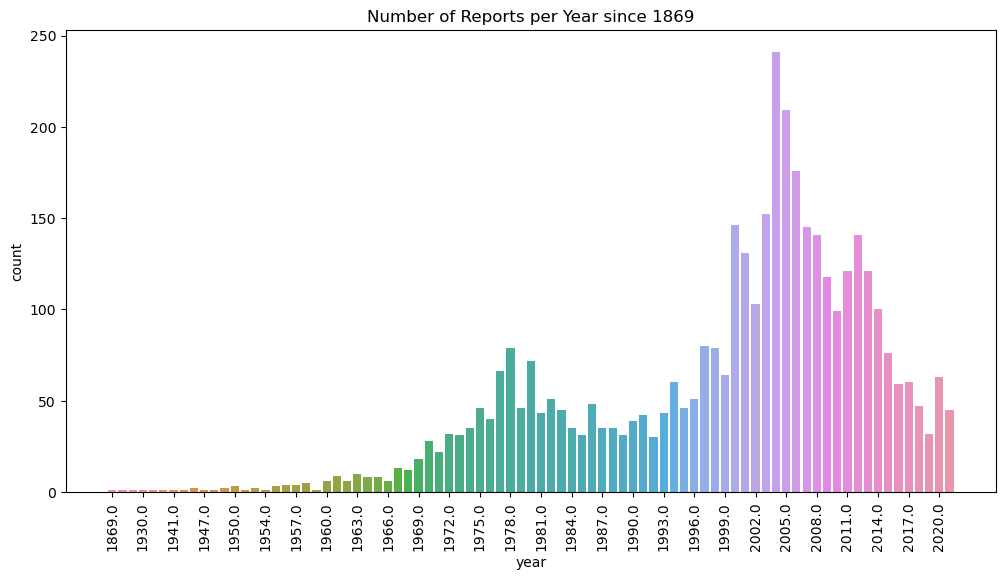

In [8]:
# plot the number of reports per year
plt.figure(figsize=(12,6))
sns.countplot(x='year', data=df)
plt.title('Number of Reports per Year since 1869')
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=35);

There are years with no observations, which are hard to see on the barplot above. Let's make another dataframe with continuous years and number of observations for each year.

In [9]:
# Create a new dataframe with the year column with values incrementing from 1869 to 2021 and the number of reports per year filled with 0
year_range = pd.DataFrame({'year': range(1869, 2022), 'count': 0})

year_range = year_range.merge(df['year'].value_counts().sort_index().reset_index(), how='left', left_on='year', right_on='year')\
    .drop('count_x', axis=1).rename(columns={'count_y': 'count'}).fillna(0)
year_range['year'] = year_range['year'].astype(int)
year_range['count'] = year_range['count'].astype(int)
year_range

,year,count
0,1869,1
1,1870,0
2,1871,0
3,1872,0
4,1873,0
...,...,...
148,2017,60
149,2018,47
150,2019,32
151,2020,63


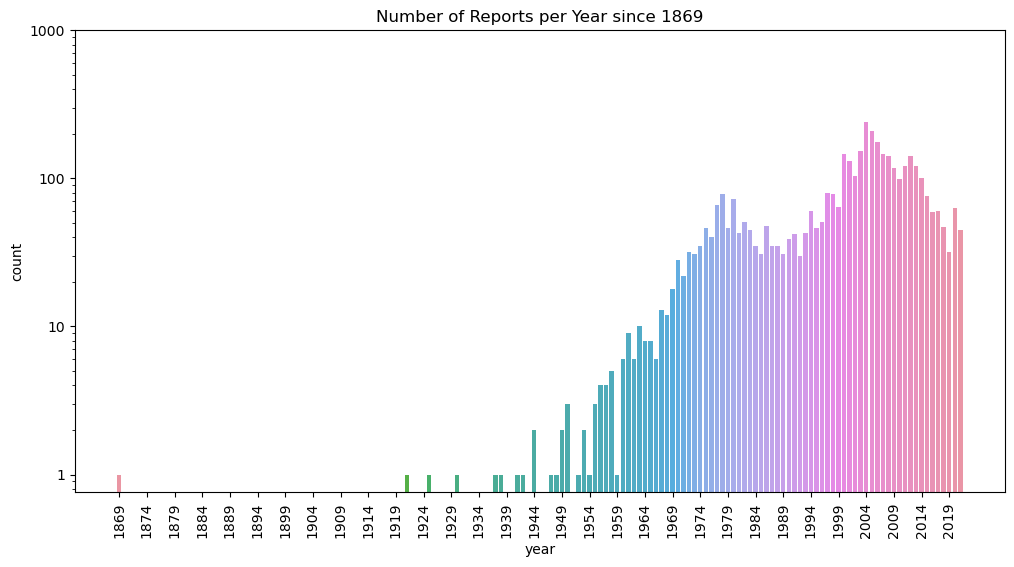

In [10]:
# Plot the number of reports for each year in the year_range dataframe
plt.figure(figsize=(12,6))
sns.barplot(x='year', y='count', data=year_range)
plt.title('Number of Reports per Year since 1869')
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=35)
plt.yscale('log')
plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000']);

In [11]:
for y in [10,30]:
    print(f'Never dropped below {y} reports per year since {year_range[year_range["count"] >= y].min().year}.')
    
for i, y in enumerate([1990, 2021]):
    print(f"Peak #{i+1}: {year_range[year_range['year'] <= y].sort_values('count', ascending=False).iloc[1]['count']} reports in {year_range[year_range['year'] <= y].sort_values('count', ascending=False).iloc[1]['year']}.")

Never dropped below 10 reports per year since 1963.
Never dropped below 30 reports per year since 1972.
Peak #1: 72 reports in 1980.
Peak #2: 209 reports in 2005.


Now we can see that there are big gaps between the initial observations. It seem like nobody have spotted Big Foot for more than 50 years since it was first encounter was reported. Then there were only sporadic reports with several-year gaps.

However as more people were getting aware that "it's possible to encounter the Big Foot on a casual hike", the more incidents were reported per year, closing the gaps between reports.

The gap was closed in 1952, and since then people see this cryptid every year. The number of sightings began increasing so that it never dropped below 10 since 1967 and below 30 since 1972.

There are two distinct periods of Big Foot "hype" with peaks in 1980 (72 reports) and in 2005 (209 reports).

## Monthly pattern

Let's find out if there is any seasonality to the Big Foot sightings.

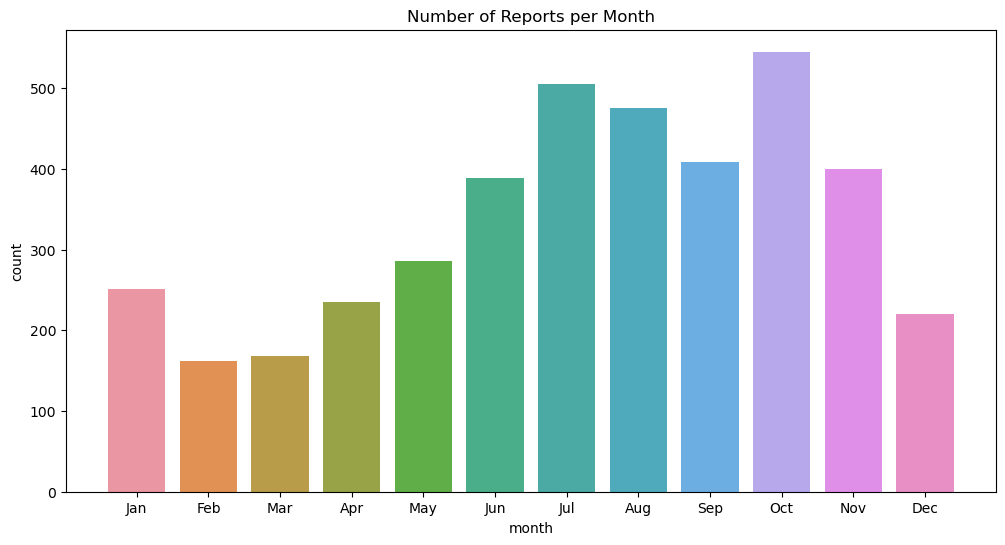

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='month', data=df)
plt.title('Number of Reports per Month')
plt.locator_params(axis='x', nbins=35)
plt.xticks(ticks=np.arange(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);

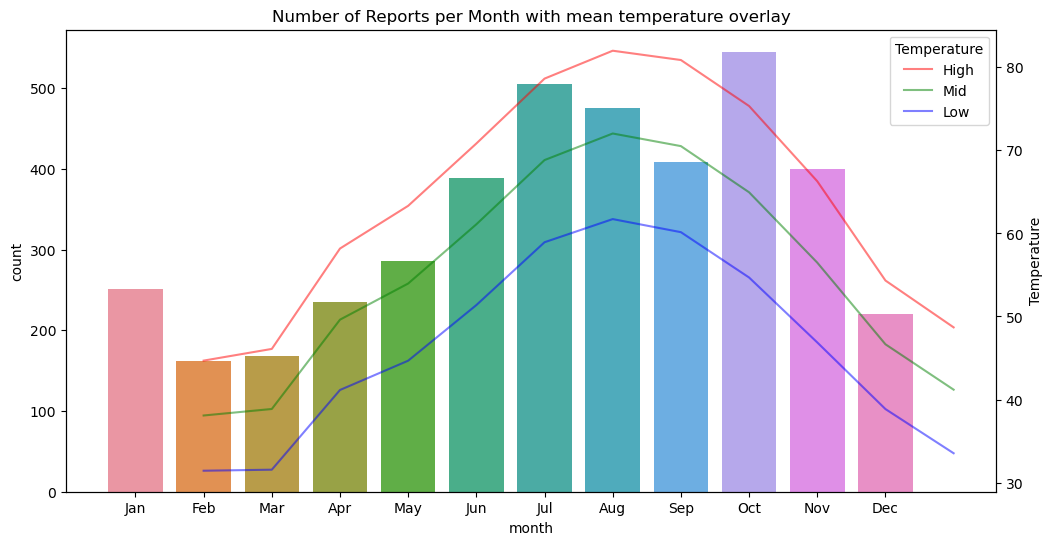

In [13]:
# Overlay the temperature data on the number of reports per month from the 'temperature_high', 'temperature_mid', 'temperature_low' columns
fig, ax1 = plt.subplots(figsize=(12,6))
sns.countplot(x='month', data=df, ax=ax1)
plt.title('Number of Reports per Month with mean temperature overlay')
plt.locator_params(axis='x', nbins=12)

ax2 = ax1.twinx()
ax2.plot(df.groupby('month')['temperature_high'].mean(), color='red', label='High', alpha=0.5)
ax2.plot(df.groupby('month')['temperature_mid'].mean(), color='green', label='Mid', alpha=0.5)
ax2.plot(df.groupby('month')['temperature_low'].mean(), color='blue', label='Low', alpha=0.5)
ax2.legend()
ax2.set_ylabel('Temperature')
plt.legend(title='Temperature')
plt.xticks(ticks=np.arange(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);


Yes! There is definitely a seasonal pattern in the number of encounters being reported. It even follows the mean temperatures pattern (averaged across all states). This raises interesting question:
Are we seeing the human's seasonality or the Big Foot's? The most obvious explanation to this is: as temperature rises, people tend to get out hiking more, thus increasing the chance of "encountering" somethign in the wild!

## Which days of the month are Big Foot's favorite days to go out?

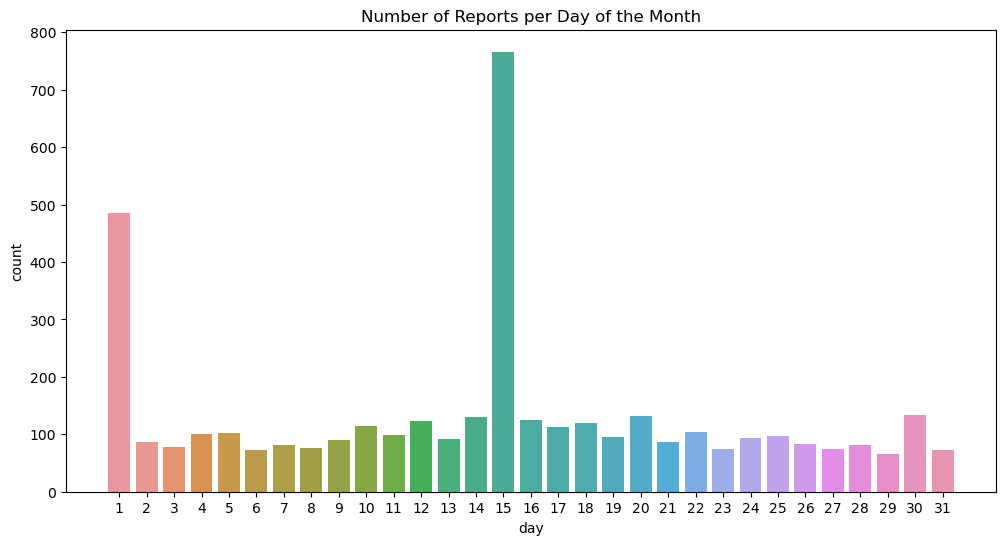

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='day', data=df)
plt.title('Number of Reports per Day of the Month')
plt.locator_params(axis='x', nbins=31)
plt.xticks(ticks=np.arange(0,31), labels=np.arange(1,32));

Well, looking at this distribution I have only one question. Is the Big Foot just getting out of the cave to cash his bi-weekly paycheck?

On a serious note, we might be looking at a good example of a recall bias! 
Responders did not remember when the event exactly happened and decided to just say an approximate date which is very likely to fall at the 1st or 15th day of a month (the beginning and the middle). Although, the majority of responders were quite creative with their dates, these two days of a month stick out too much - 5x and 8x compared to any other day.

## Geospatial analysis

Next, let's see which areas our elusive creature was seen the most.

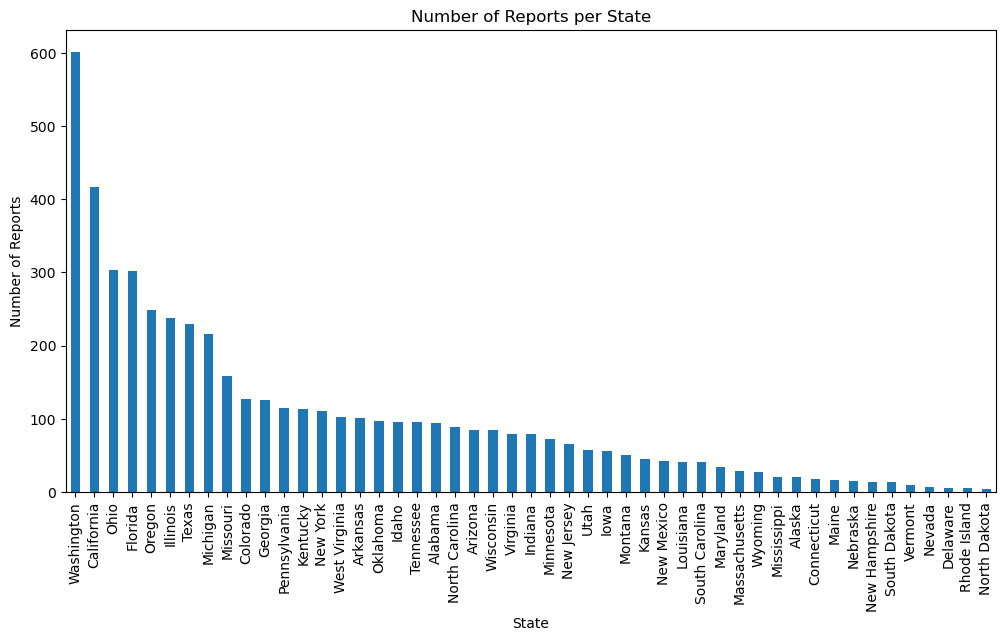

state
Washington    601
California    417
Ohio          303
Florida       302
Oregon        249
Name: count, dtype: int64

In [15]:
df['state'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title('Number of Reports per State')
plt.xlabel('State')
plt.ylabel('Number of Reports')
plt.xticks(rotation=90)
plt.show()
df['state'].value_counts().head()

We see that the most popular spot to see the Big Foot is the Washington state with 601 observations over the years. Followed by California (417 observations) and surprizingly Ohio and Florida with ~300 observations in each.
Interestingly, the number of observations in the Oregon is much lower than in Washington and California, which is weird since this state is located between the two. 

Let's visualize this data on the map.

In [16]:
map = folium.Map(df[['latitude','longitude']].median().values.tolist(), 
                zoom_start=2)

HeatMap(data=df[['latitude','longitude']].groupby([
    'latitude','longitude']).sum().reset_index().values.tolist(), 
        radius=7, max_zoom=10).add_to(map)

# zoom to the US
map.fit_bounds([[24.396308, -125.0], [49.384358, -66.93457]])

map

It seems like the "hottest" spot is Seattle area and its suburbs. But otherwize, the trend is generally following the destinations people would go to hike or camp (surrounding major cities like Phoenix, Denver, New York, Houston, Dallas, etc.)

## Map of observations throughout the years

In [17]:
# Create a new dataframe with the number of reports per state per year
state_year = df.groupby(['state', 'year']).size().reset_index().rename(columns={0: 'count'})
state_year['year'] = state_year['year'].astype(int)

year_range['count'] = 0

state_year = year_range.merge(state_year, how='left', left_on='year', right_on='year')\
    .drop('count_x', axis=1).rename(columns={'count_y': 'count'})
state_year.sort_values('year', inplace=True)
state_year.fillna({'count': 0}, inplace=True)
# Create abbreviations for the states in the state column
state_abbrev = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'
}
state_year['state'] = state_year['state'].map(state_abbrev)
# state_year.ffill(inplace=True)
state_year.head()

,year,state,count
0,1869,CA,1.0
1,1870,NaN,0.0
2,1871,NaN,0.0
3,1872,NaN,0.0
4,1873,NaN,0.0


In [18]:
fig = px.choropleth(state_year,
                    locations='state',
                    locationmode='USA-states',
                    color='count',
                    scope='usa',
                    animation_frame='year',
                    color_continuous_scale='Viridis',
                    title='Timeline of Reports per State',
                    category_orders={'state': state_year['state'].unique()})

fig.update_layout(coloraxis_colorbar=dict(title='Report Count', tickvals=[1, 10, 100, 1000], ticktext=['1', '10', '100', '1000']))
fig.show()

## The story behind the first observations

Now, let's see what people say about their encounters. Obviously we cannot read them all, so let's focus on the first ones. Then we'll do something cool.

In [19]:
def print_report(data, record_number):
    def print_wrapped_text(text, line_length=80):
        words = text.split()
        current_line = ''
        
        for word in words:
            if len(current_line) + len(word) <= line_length:
                current_line += word + ' '
            else:
                print(current_line)
                current_line = word + ' '
        
        # Print any remaining text
        if current_line:
            print(current_line)
    data = data.sort_values('year')
    title = data.iloc[record_number].title
    text = data.iloc[record_number].observed
    print(f"Report #{record_number+1} from {data.iloc[record_number].state} in {int(data.iloc[record_number].year)}")
    try: 
        print_wrapped_text(title, 80)
    except AttributeError: pass
    print()
    try:
        print_wrapped_text(text, 80)
    except AttributeError: pass
    print()

In [21]:
for i in range(4):
    print_report(df, i)

Report #1 from California in 1869
Report 14338: Old newspaper article (Titusville Morning Herald - Pennsylvania) 
about sightings near Orestimba Creek in the Diablo (Devil) Mountains 

The article below, titled "The Wild Man - What is He?", was originally published 
in the New York Times in 1871. Shortly afterward this article was re-printed in 
the Petersburg Index (Virginia), and assumably other newspapers as well. 

Report #2 from Pennsylvania in 1921
Report 14358: Old newspaper article (Clearfield Progress - Pennsylvania) 
sightings by farmers in Clearfield County 


Report #3 from Louisiana in 1925
Report 24413: Woman recounts a tale her Grandfather told her about a frightening 
incident near Horseshoe Lake 

Because of today's report of a Bigfoot Body, my memory was jarred by a story 
from my now deceased grandfather. In the Fall of 1925 my grandfather and his 
brother were hunting duck around Horsehoe Lake in Bordelonville, Louisiana. The 
area was swampy and woodsy, but opened 

The fist article is from the Pennsylvanian newspaper about the event presumably happened in California, all the way across the continent. 
Next time, 50 years later, another Pennsylvanian newspaper decides to write about the creature seen by farmers (within Pennsylvania this time).
Next report is from a woman telling her family legend. 
The fourth one is describing event happened to two men hunting and and seeing a 6' tall creature carrying a 300lbs calf. Upon returning to the same place accompanied by the Sheriff, they indeed found a dead calf. However there was no evidence of who exactly killed this calf. 
So, we've got an idea.

Let's read a random report from the first "surge's" peak (1980) next.

In [30]:
# pick a random report from 1980
print_report(df.query('year == 1980'), np.random.choice(df.query('year == 1980').shape[0]))

Report #57 from Virginia in 1980
Report 31594: Memory told of a possible sighting of two juveniles tree climbing 
at sundown near Farmville 

My ex's step father was born in Amelia County, Va, so my husband hunted a lot 
where his step father had family land there, I would sit in the car while he 
went hunting. It was getting dark [dusk] and I could hear children playing, but 
just over looked it. A few minutes later my husband scared me when he came up to 
the car from the rear, and eased the door open to put his shotgun in the back. 
He was uneasy about something, so I asked what was wrong. He told me to roll up 
the car windows, but leave a crack for air. He was scaring me, which he never 
did, he was scared of NOTHING. He pointed to a large tree in the field ahead of 
us. What I saw was the SAME animal you showed in the Dec 31, show [NY State]. It 
made the hair on my neck rise, and a chill go down my back, I still feel that 
fear even today. It looked like 2 of them, just crawling

And a random report from the 2005

In [31]:
# pick a random report from 2005
print_report(df.query('year == 2005'), np.random.choice(df.query('year == 2005').shape[0]))

Report #209 from Kentucky in 2005
Report 1045: Father and son have a daylight encounter while deer hunting near 
Lawrenceburg 

The appearance of the thing was just as I have seen on tv stories and 
descriptions I have heard of. As far as the behavior of it, it was very shy as 
it appeared to not want to be seen. My son and I had been deer hunting on a 
local farm. When time came to leave, we met up and started back to my truck. 
About 50 yards down our path we heard something coming out of a cedar thicket 
and we both saw it. It stood app. 8 feet tall and had long brown hair all over 
it. We stopped and it stopped at the same time. We didn't know what to say or 
do. Then it just stepped back into the thicket and went away out of sight. We 
got back to my truck as fast as we could, but we could hear something following 
us the whole time. But it did stay completly out of sight. I haven't told too 
many people about this, because they always laugh at us or start making jokes. I 
know I'

We see more personal reports here. Frequently they are from people who watched some TV show featuring Big Foot and then wrote letters to the studio, describing their own encounters.

## What's Big Foot's Height?

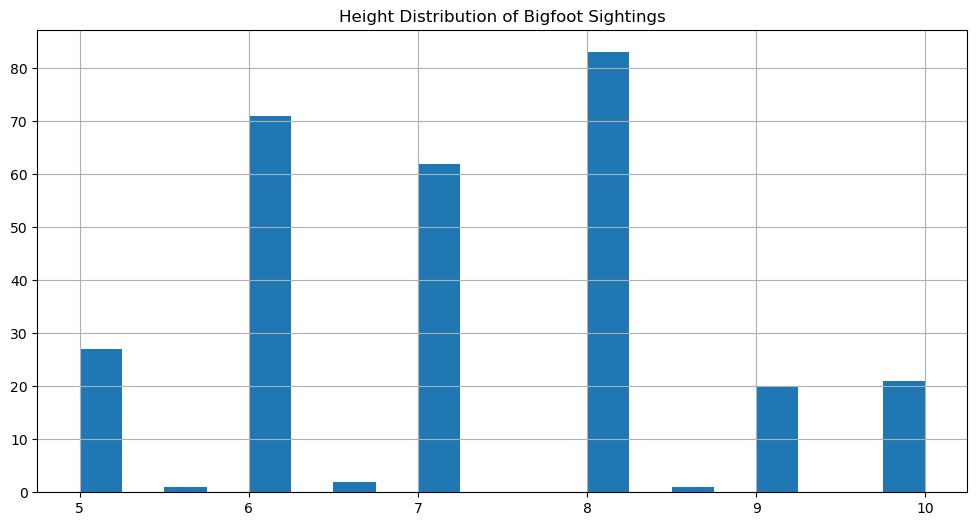

In [49]:
# Get all "X feet" and "X foot" strings from the 'observed' column
heights = df['observed'].str.extractall(r'(\d+\.?\d*)\sfoot|\d+\.?\d*\sfeet').astype(float)
heights.columns = ['height']
heights['height'] = heights['height'].astype(float)
heights.reset_index(inplace=True, drop=True)
heights.dropna(inplace=True)
# Drop heights that are more than 10 feet and less than 5 feet
heights = heights[(heights['height'] <= 10) & (heights['height'] >= 5)]
heights.hist(bins=20, figsize=(12,6))
plt.title('Height Distribution of Bigfoot Sightings');

Extracting the strings containing length from the reports and discarding everything that obviously refers to distance, we can assume that most people say that Big Foot's height ranges between 6 and 8 feet. 

## Word Cloud
Finally, let's look at the most frequent words from all reports.

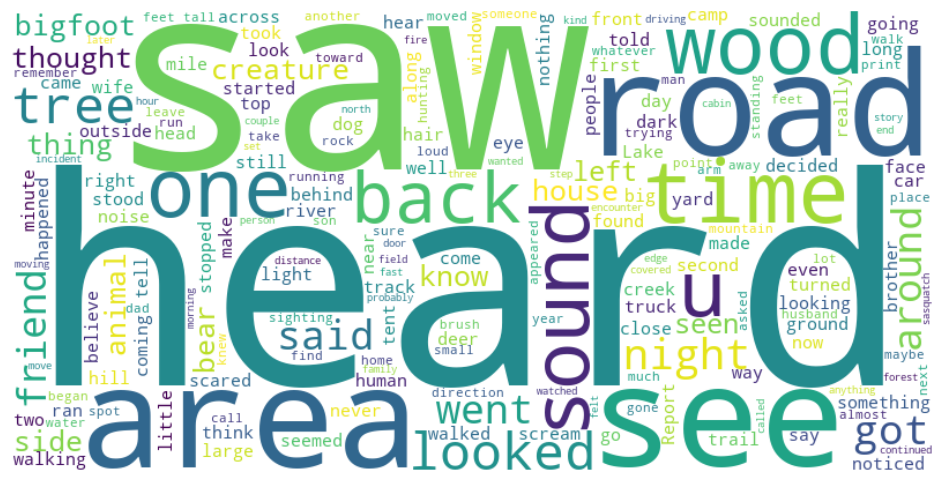

In [54]:
# Create a cloud of words from the 'observed' and 'title' columns
text = ' '.join(df['observed'].dropna().tolist() + df['title'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

As expected, the most common words are "perception" verbs (`hear`, `see`, `look`) and the word `sound`.
The ones describing the `area` are also very popular.
`Time` is probably referring to the "late time", as `night` is also very popular.
Many reports mention being with a `friend`.
Fun detail, many report mention `tree` or `wood`.

At last, let's try a different approach and tockenize the words and remove all stopwords.

[nltk_data] Downloading package punkt to /Users/anton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/anton/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


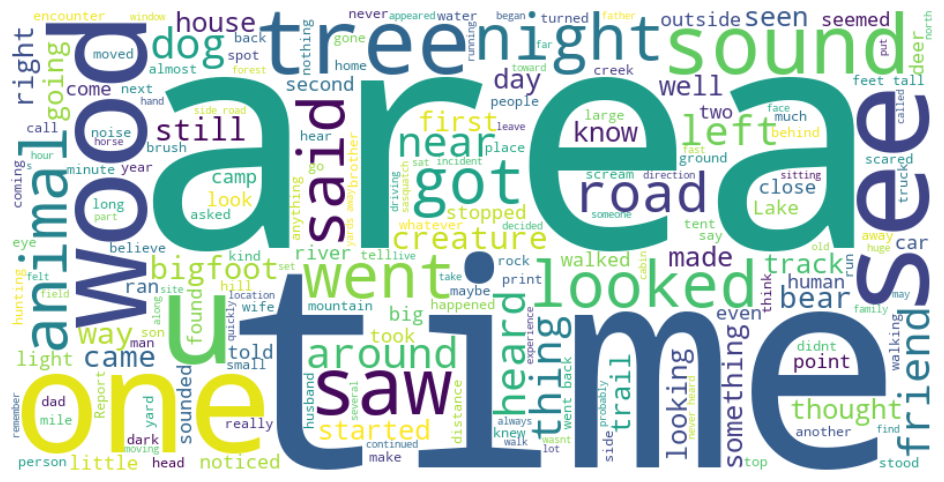

In [65]:
# Use nltk to tokenize the words in the 'observed' and 'title' columns and create a word cloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

def tokenize(text):
    return word_tokenize(text)

def clean_text(text):
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    return text

text = ' '.join(df['observed'].dropna().apply(clean_text).tolist() + df['title'].dropna().apply(clean_text).tolist())
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The result has a similar vibe, but stresses different words: `time`, `area`, `wood`, `tree`, `sound`, etc.

# Wrap Up
The possibilities for exploration seem endless. However, for now, we'll stop here, knowing that there's always more to uncover.